# Library

In [2]:
## For loading the pickle
import pandas as pd
## Numpy for the heatmap
import numpy as np
## Displaying the heatmap
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data Spawn

In [29]:
spawn_region = 100
## Read the dataframe
df = pd.read_pickle("../../data/ufficial/pickle/kills.pkl")\
                    .dropna(how='any',axis=0)\
                    .filter(['x_death', 'y_death', 'z_death'])
## Taking only the values we need
data_us = df[((df.x_death > -spawn_region) 
              & (df.x_death < spawn_region)) 
              & ((df.z_death > -spawn_region) 
              & (df.z_death < spawn_region))]
## Values we want
#[["x_death", "z_death"]]

Text(0, 0.5, 'z')

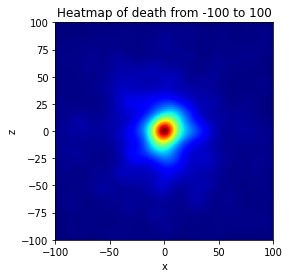

In [30]:
data = np.vstack([data_us["x_death"].values, data_us["z_death"].values])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(spawn_region, -spawn_region, 100)
ygrid = np.linspace(spawn_region, -spawn_region, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower',
           extent=[-spawn_region, spawn_region, -spawn_region, spawn_region],
           cmap=plt.cm.jet)
## informations
plt.title('Heatmap of death from -100 to 100')
plt.xlabel('x')
plt.ylabel('z')

# Data World
## Y Death

In [113]:
for value, perc in (df.y_death.value_counts(normalize=True) * 100).items():
    print("Y: %f Perc: %f" % (value, perc))

Y: 120.000000 Perc: 8.259475
Y: 63.000000 Perc: 7.814215
Y: 64.000000 Perc: 7.453364
Y: 121.000000 Perc: 3.201232
Y: 65.000000 Perc: 2.992319
Y: 67.000000 Perc: 2.711657
Y: 70.000000 Perc: 2.627247
Y: 68.000000 Perc: 2.557610
Y: 62.000000 Perc: 2.487972
Y: 71.000000 Perc: 2.384570
Y: 69.000000 Perc: 2.331814
Y: 66.000000 Perc: 2.068034
Y: 5.000000 Perc: 1.947750
Y: 4.000000 Perc: 1.897105
Y: 61.000000 Perc: 1.846459
Y: 72.000000 Perc: 1.770490
Y: 119.000000 Perc: 1.591120
Y: 73.000000 Perc: 1.287246
Y: 74.000000 Perc: 1.278805
Y: 256.000000 Perc: 1.228159
Y: 79.000000 Perc: 1.099434
Y: 59.000000 Perc: 1.088883
Y: 60.000000 Perc: 1.027686
Y: 3.000000 Perc: 0.972820
Y: 75.000000 Perc: 0.854647
Y: 115.000000 Perc: 0.848316
Y: 76.000000 Perc: 0.814552
Y: 80.000000 Perc: 0.761796
Y: 2.000000 Perc: 0.759686
Y: 78.000000 Perc: 0.709040
Y: 58.000000 Perc: 0.683717
Y: 81.000000 Perc: 0.656284
Y: 77.000000 Perc: 0.580316
Y: 56.000000 Perc: 0.531780
Y: 6.000000 Perc: 0.525449
Y: 118.000000 Perc: 

## X Death